In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# The Wald Test

We are given the statistical model $\left( \mathit{E}, \{ \mathbb{P}_\theta\}_{\theta \in \Theta} \right)$.  Let $\theta$ denote the true parameter of our distribution.  To build a Wald test we need an estimator $\hat{\theta}$ of the form

$$\frac{\hat{\theta} - \theta}{\sqrt{\widehat{\text{var}}(\hat{\theta})}}\overset{(d)}{\underset{n \rightarrow \infty}{\to}} \mathcal{N}(0,1)$$

Where $\widehat{\text{var}}(\hat{\theta})$ is an estimator for the variance of $\hat{\theta}$.

For example if we have a family of Bernoulli distributions with true parameter $p$, then an estimator for $p$ is $\hat{p} = \overline{X}_n$.  Now what is the variance of $\hat{p}$?  It is $\frac{p(1-p)}{n}$, but this is not an estimator since it depends on our unknown parameter $p$.  How do we turn it into an estimator?  Put a hat on it.  Or more precicely, we replace the unknown parameter with an estimator for that parameter.

$$\widehat{\text{var}}(\hat{p})= \frac{\hat{p}(1-\hat{p})}{n}$$

By using the CLT and Slutsky's Lemma we have 

$$\frac{\hat{p} - p}{\sqrt{\widehat{\text{var}}(\hat{p})}}=\sqrt{n}\frac{\hat{p} -p}{\sqrt{\hat{p}(1-\hat{p})}}\overset{(d)}{\underset{n\to\infty}{\to}} \mathcal{N}(0,1)$$

Now, lets build the test more generaly.  We have the estimator

$$W := \frac{\hat{\theta} - \theta_0}{\sqrt{\widehat{\text{var}}(\hat{\theta})}}$$

Now let's set up our hypotheses. Suppose we are testing to see if $\hat{\theta}$, the estimator for $\theta$, is close to some value $\theta_0$. We can look at the absolute value to get a two sided test, or just look at $W$ itself if we are in a one-sided scenario.

$$
\begin{array}{r|c|c|c}
&
\begin{array}{c}H_0: \theta = \theta_0 \\ H_1: \theta \ne \theta_0\end{array} &
\begin{array}{c}H_0: \theta \le \theta_0 \\ H_1: \theta \gt \theta_0\end{array} &
\begin{array}{c}H_0: \theta \ge \theta_0 \\ H_1: \theta \lt \theta_0\end{array} &   \\
\hline
\text{Wald Test: } \psi&\mathbb{1}\{|W|\gt q_{\alpha/2}\}&\mathbb{1}\{ W \gt q_\alpha\}&\mathbb{1}\{ W \lt q_\alpha\} \\
\end{array}
$$

So what values of $q_{\alpha/2}$ and  $q_\alpha$ do we use to get a desired level for the test?  We have suggestively written them like they were quantiles of a standard normal since we have asymtotic normality for our estimator, that makes sense.

## Asymtotic level of the Wald Test

We consider first the case of a two sided test.  We are interested in determining when we will reject the null hypothesis.  This is saying that if our test $\psi$ returns a value of $1$ under the null hypothesis on $\theta$ then we will reject the null hypothesis.  Stipulating that our test be done under the null hypothesis is an important and subtle point.  When we compute the value that our test is giving us we are doing so under the null hypothesis.  That is we are computing the value of the test based on the assumption that the true $\theta$ is as per our null hypothesis.  That is to say that we will be computing the value of our Wald's test with the assumption that $\theta = \theta_0$.  In the case of two sided tests, this does not present a hurdle to comuting the asymtotic level, but it does raise a small issue in the single sided tests as you will see below.

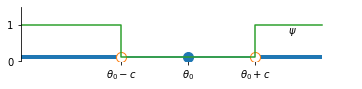

In [23]:
# set up the figure
fig, ax = plt.subplots(figsize=(6,1))
ax.set_xlim(0,10)
ax.set_ylim(0,1.5)

# name some important points on the line
xmin = 0
xmax = 9
y = 0.1
theta_0 = 5
c = 2

# the fail to reject portion
plt.plot(theta_0,y,'o',ms=10)
plt.hlines(y, theta_0 - c, theta_0 + c)
plt.plot([theta_0 -c,theta_0 + c],[y,y], 'o', ms=10, mfc="w")
#plt.plot(theta_0 - c,y, 'o', ms=10, mfc="w")

# make rejection region line heavier weight
plt.hlines(y,theta_0 + c, xmax, lw=4)
plt.hlines(y,xmin, theta_0 - c, lw=4)

# label our test function
plt.text(theta_0+3,0.75,"$\psi$")

# Plot our test function
x=[1,1,1,0.1,0.1,0.1,0.1,1,1,1]
plt.plot(x,drawstyle="steps-post",label="$\psi(X_1,...,X_n)$")

plt.xticks(ticks=[theta_0-c,theta_0,theta_0+c],labels=[r'$\theta_0 - c$',r'$\theta_0$',r'$\theta_0+c$'])
plt.plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#plt.axis('off')
plt.show()

Since we are looking at an asymtotitc level we consider

$$\underset{n\to \infty}{\lim}\mathbb{P}_{\theta}\left[ \psi = 1 \right]$$

Under the null hypothesis this means that $\theta = \theta_0$ and if we substitute for $\psi$ the definition of the test we rewrite this as.

$$=\underset{n\to \infty}{\lim}\mathbb{P}_{\theta_0}\left[ |W| \gt q_{\alpha/2} \right]$$

Where we note that the probability is now over $\theta = \theta_0$.  As we saw above, but the Central Limit Theorem and Slutsky's Lemma we have that this converges in distribution to $\mathcal{N}(0,1)$ where

$$W=\frac{\hat{\theta}-\theta_0}{\sqrt{\widehat{\text{var}}(\hat{\theta})}}$$

What is this saying?  If we construct an estimator $W$ centered at $\theta_0$ normalized by dividing by the square root of the estimated variance of our estimator $\hat{\theta}$ then $W$ converges to a standard normal.  Now we can use the standard normal quantiles to bound the asymtotic level for our Wald Test.  Thus we get that

$$\underset{n\to \infty}{\lim}\mathbb{P}_{\theta_0}\left[ \psi = 1 \right] = \mathbb{P}\left[ |Z| \gt q_{\alpha/2} \right] = \alpha$$

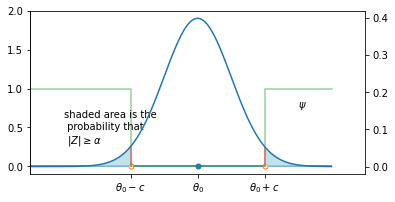

In [84]:

# set up the figure
fig, ax = plt.subplots(figsize=(6,3))
ax.set_xlim(0,10)
ax.set_ylim(-0.1,2)

# name some important points on the line
xmin = 0
xmax = 9
y = 0.1
theta_0 = 5
c = 2

# the fail to reject portion
plt.plot(theta_0,0,'o',ms=5)
plt.hlines(0, theta_0 - c, theta_0 + c)
plt.plot([theta_0 -c,theta_0 + c],[0,0], 'o', ms=5, mfc="w")
#plt.plot(theta_0 - c,y, 'o', ms=10, mfc="w")

# make rejection region line heavier weight
plt.hlines(0,theta_0 + c, xmax)
plt.hlines(0,xmin, theta_0 - c)

# label our test function
plt.text(theta_0+3,0.75,"$\psi$")

# Plot our test function
x=[1,1,1,0,0,0,0,1,1,1]
plt.plot(x,drawstyle="steps-post",label="$\psi(X_1,...,X_n)$", alpha=0.5)

plt.xticks(ticks=[theta_0-c,theta_0,theta_0+c],labels=[r'$\theta_0 - c$',r'$\theta_0$',r'$\theta_0+c$'])
plt.plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#plt.axis('off')

# plot our normal dist with different y axis
# x values for the normal plot.
ax2 = ax.twinx()
x = np.linspace(xmin, xmax, 201)

#freeze a normal dist.
rv = norm(theta_0, 1)

# plot our normal function.
ax2.plot(x, rv.pdf(x), label='Normal Distribution\n scipy.stats.norm.pdf(x)')

ax2.vlines(x=[theta_0-c, theta_0+c], ymin=[0, 0], ymax=[rv.pdf(theta_0-c), rv.pdf(theta_0+c)], color='red', alpha=0.5)
x_left=np.linspace(xmin,theta_0-c,201)
x_right=np.linspace(theta_0+c,xmax,201)
ax2.fill_between(x_left, rv.pdf(x_left), alpha=0.75, facecolor='lightblue')
ax2.fill_between(x_right, rv.pdf(x_right), alpha=0.75, facecolor='lightblue')
ax.text(1,0.3,"shaded area is the \n probability that\n $|Z| \geq \\alpha$ ")
plt.axis('on')
#ax.legend()

plt.show()

We can carry out a similar analysis for the other cases.  Let's look at the one sided test based on

$$H_0: \theta \le \theta_0 \\ H_1: \theta \gt \theta_0$$

So what are we looking to control?  Since we are looking to control the type 1 error rate we want to have that for any $\theta \le \theta_0$ we want to be able to place a bound on the following limit:

$$\underset{n\to \infty}{\lim}\mathbb{P}_{\theta}\left[ \psi = 1 \right] = \underset{n\to \infty}{\lim}\mathbb{P}_{\theta}\left[ W \gt q_{\alpha} \right] = \underset{n\to \infty}{\lim}\mathbb{P}_{\theta} \left[ \frac{\hat{\theta}-\theta_0}{\sqrt{\widehat{\text{var}}(\hat{\theta})}}\gt q_\alpha \right]$$

Where the reasoning is as above.  The wrinkle here is that we would like that limit to converge to $\alpha$ however we want that convergence to be true for all possible $\theta$ that are in the null hypothesis region.  Right now we have an expression that reports the probability relative to a $\theta \in (-\infty, \theta_0)$, but our estimator is only telling us asymtotic results relative to the centre $\theta_0$.  Let's work on that.

If we rewrite our $W$ statistic as

$$\frac{\hat{\theta}-\theta_0}{\sqrt{\widehat{\text{var}}(\hat{\theta})}}=\frac{\hat{\theta}-\theta}{\sqrt{\widehat{\text{var}}(\hat{\theta})}} + \frac{\theta-\theta_0}{\sqrt{\widehat{\text{var}}(\hat{\theta})}}$$

where $\theta \lt \theta_0$ then the second term above will always be negative and thus if we just look at the first term we see that

$$\underset{n\to \infty}{\lim}\mathbb{P}_{\theta}\left[ \psi = 1 \right] \le \underset{n\to \infty}{\lim}\mathbb{P}_{\theta}\left[\frac{\hat{\theta}-\theta}{\sqrt{\widehat{\text{var}}(\hat{\theta})}}\gt q_\alpha \right]$$

Where now we do not have an equality but an inequality and we have that the right hand side converges to a standard normal.  Thus we can write

$$\underset{n\to \infty}{\lim}\mathbb{P}_{\theta}\left[ \psi = 1 \right] \le \mathbb{P}_{\theta}\left[ Z \gt q_\alpha \right] = \alpha$$

where $Z \sim \mathcal{N}(0,1)$

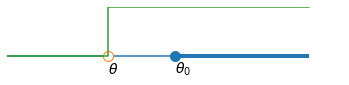

In [88]:
# set up the figure
fig, ax = plt.subplots(figsize=(6,1))
ax.set_xlim(0,10)
ax.set_ylim(-0.1,1)

# name some important points on the line
xmin = 0
xmax = 9
y = 0
theta = 3
theta_0 = 5

# the fail to reject portion
plt.plot(theta_0,y,'o',ms=10)
plt.hlines(y, xmin, theta_0)
plt.plot(theta,y, 'o', ms=10, mfc="w")
#plt.plot(theta_0 - c,y, 'o', ms=10, mfc="w")

# make rejection region line heavier weight
plt.hlines(y,theta_0, xmax, lw=4)

# label our parameter theta_0 and c
plt.text(theta, y-0.35, r'$\theta$', fontsize=14)
plt.text(theta_0, y-0.35, r'$\theta_0$', fontsize=14)
#plt.text(theta_0+3,0.75,"$\psi$")

# Plot our test function
x=[0,0,0,1,1,1,1,1,1,1]
plt.plot(x,drawstyle="steps-post",label="$\psi(X_1,...,X_n)$")

plt.plot
plt.axis('off')
plt.show()

The argument for the third type of test where our null hypothesis is that $\theta$ exceeds some value $\theta_0$ is exactly the same.  The only change is that when we look at 

$$\frac{\hat{\theta}-\theta_0}{\sqrt{\widehat{\text{var}}(\hat{\theta})}}=\frac{\hat{\theta}-\theta}{\sqrt{\widehat{\text{var}}(\hat{\theta})}} + \frac{\theta-\theta_0}{\sqrt{\widehat{\text{var}}(\hat{\theta})}}$$

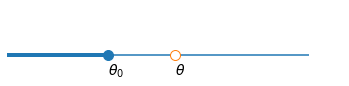

In [82]:
# set up the figure
fig, ax = plt.subplots(figsize=(6,1))
ax.set_xlim(0,10)
ax.set_ylim(0,1)

# name some important points on the line
xmin = 0
xmax = 9
y = 0.1
theta = 5
theta_0 = 3

# the fail to reject portion
plt.plot(theta_0,y,'o',ms=10)
plt.hlines(y, theta_0, xmax)
plt.plot(theta,y, 'o', ms=10, mfc="w")
#plt.plot(theta_0 - c,y, 'o', ms=10, mfc="w")

# make rejection region line heavier weight
plt.hlines(y,xmin, theta_0, lw=4)

# label our parameter theta_0 and c
plt.text(theta, y-0.35, r'$\theta$', fontsize=14)
plt.text(theta_0, y-0.35, r'$\theta_0$', fontsize=14)
#plt.text(theta_0+3,0.75,"$\psi$")

# Plot our test function
#x=[1,1,1,1,0.1,0.1,1,1,1,1]
#plt.plot(x,drawstyle="steps-post",label="$\psi(X_1,...,X_n)$")

plt.plot
plt.axis('off')
plt.show()

we see that since $\theta \gt \theta_0$ then $\theta - \theta_0 \gt 0$ and hence our inequalities are reversed.

So if 

$$H_0: \theta \ge \theta_0 \\ H_1: \theta \lt \theta_0$$

That is we want to bound the following limit:

$$\underset{n\to \infty}{\lim}\mathbb{P}_{\theta}\left[ \psi = 1 \right] = \underset{n\to \infty}{\lim}\mathbb{P}_{\theta}\left[ W \lt q_{\alpha} \right] = \underset{n\to \infty}{\lim}\mathbb{P}_{\theta} \left[ \frac{\hat{\theta}-\theta_0}{\sqrt{\widehat{\text{var}}(\hat{\theta})}}\lt q_\alpha \right]$$


If we rewrite our $W$ statistic as

$$\frac{\hat{\theta}-\theta_0}{\sqrt{\widehat{\text{var}}(\hat{\theta})}}=\frac{\hat{\theta}-\theta}{\sqrt{\widehat{\text{var}}(\hat{\theta})}} + \frac{\theta-\theta_0}{\sqrt{\widehat{\text{var}}(\hat{\theta})}}$$

where $\theta \gt \theta_0$ then the second term above will always be positive and thus if we just look at the first term we see that

$$\underset{n\to \infty}{\lim}\mathbb{P}_{\theta}\left[ \psi = 1 \right] \ge \underset{n\to \infty}{\lim}\mathbb{P}_{\theta}\left[\frac{\hat{\theta}-\theta}{\sqrt{\widehat{\text{var}}(\hat{\theta})}}\lt q_\alpha \right]$$

Where now we do not have an equality but an inequality and we have that the right hand side converges to a standard normal.  Thus we can write

$$\underset{n\to \infty}{\lim}\mathbb{P}_{\theta}\left[ \psi = 1 \right] \ge \mathbb{P}_{\theta}\left[ Z \lt q_\alpha \right] = \alpha$$

where $Z \sim \mathcal{N}(0,1)$